In [3]:
data = [l.strip().split(",") for l in open("input.txt").readlines()]

In [4]:
len(data)

2

In [5]:
len(data[0])

301

In [6]:
p = data[0][2]
print(p[:1], int(p[1:]))

R 349


In [7]:
# assuming a starting-point (0,0). 
# R ->  +x, U -> +y, L -> -x, D -> -y

def movs_to_coor(line):
    path = [(0,0)]
    prev = (0,0)
    for p in line:
        d, l = (p[:1], int(p[1:]))
        if d == 'R':
            n = (prev[0]+l,prev[1])
        elif d == 'U':
            n = (prev[0], prev[1]+l)
        elif d == 'L':
            n = (prev[0]-l, prev[1])
        elif d == 'D':
            n = (prev[0], prev[1]-l)
        else:
            raise ValueError('Unknown idx')
        prev = n
        path.append(n)
    return path
apath = movs_to_coor(data[0])
bpath = movs_to_coor(data[1])

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


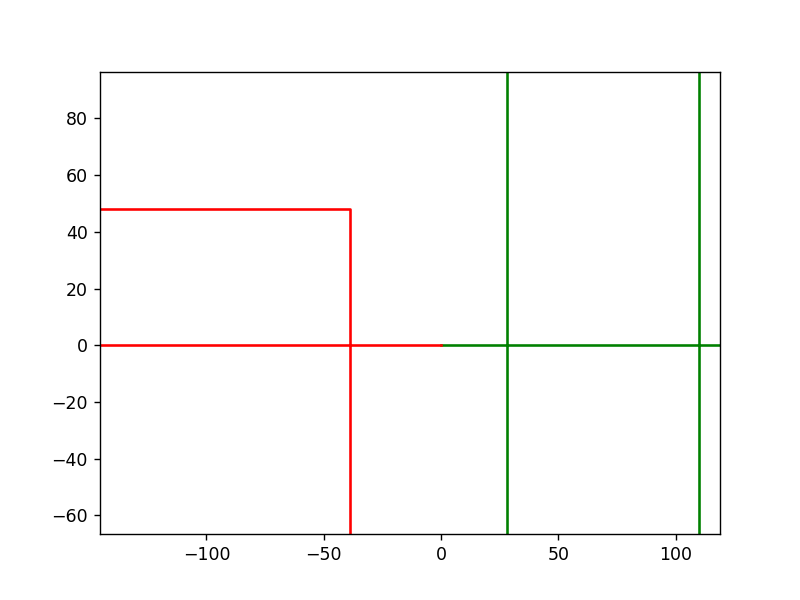

In [9]:
plt.plot([p[0] for p in apath], [p[1] for p in apath], 'g')
plt.plot([p[0] for p in bpath], [p[1] for p in bpath], 'r')

In [56]:
170+39

209

In [27]:
dirs = {'R': 1, 'U': 1, 'L': -1, 'D': -1}
axis = {'R': 0, 'U': 1, 'L': 0, 'D': 1}

points = {}
def segment_points(points, data):
    # do not track self-intersection - require two-pass...
    lp = {}
    pos = [0,0]
    total_distance = 0
    for segment in data:
        d, l = (segment[:1], int(segment[1:]))
        sign = dirs[d]
        ax = axis[d]
        for i in range(l):
            pos[ax]+=sign
            total_distance+=1
            tp = tuple(pos)
            # track total distance, but skip insert if already present (self-intersection)
            lp[tp] = min(lp.get(tp, total_distance), total_distance)
    for k, v in lp.items():    
        points[k] = points.get(k,0)+1
    return lp
dist_a = segment_points(points, data[0])            
dist_b = segment_points(points, data[1])        

In [39]:
# part 1
print("part1:", min([abs(p[0])+abs(p[1]) for p,v in points.items() if v > 1]))

part1: 209


In [40]:
# find total-dists to crossings:
# part 2
print("part2:", min([dist_a[p]+dist_b[p] for p,v in points.items() if v > 1]))

part2: 43258
